In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
!pip install rarfile

In [ ]:
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image
# Download the RAR file
url = 'https://drive.google.com/uc?id=1sRuV2_o399bVaMUajLVXINkZoE1bD8Gk'
output_rar = '/content/Train_Augumented_Dataset_Leguminosae_3C_Dataset.rar'
gdown.download(url, output_rar, quiet=False)
# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')

Downloading...
From (original): https://drive.google.com/uc?id=1sRuV2_o399bVaMUajLVXINkZoE1bD8Gk
From (redirected): https://drive.google.com/uc?id=1sRuV2_o399bVaMUajLVXINkZoE1bD8Gk&confirm=t&uuid=d53442d7-48d8-4c14-9a29-0433eaeb171b
To: /content/Train_Augumented_Dataset_Leguminosae_3C_Dataset.rar
100%|██████████| 96.7M/96.7M [00:01<00:00, 49.9MB/s]


In [ ]:
# Path to the extracted dataset folder
dataset = '/content/Train_Augumented_Dataset_Leguminosae_3C_Dataset'

Found 3726 images belonging to 4 classes.
Found 87 images belonging to 4 classes.
Found 181 images belonging to 4 classes.
Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.6693 - loss: 0.7963 - val_accuracy: 0.2414 - val_loss: 2.3104
Epoch 2/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 72s 424ms/step - accuracy: 0.8853 - loss: 0.2967 - val_accuracy: 0.2529 - val_loss: 10.0839
Epoch 3/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 49s 413ms/step - accuracy: 0.9267 - loss: 0.2107 - val_accuracy: 0.2529 - val_loss: 14.3507
Epoch 4/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 83s 424ms/step - accuracy: 0.9507 - loss: 0.1396 - val_accuracy: 0.3908 - val_loss: 6.4567
Epoch 5/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 49s 412ms/step - accuracy: 0.9196 - loss: 0.2078 - val_accuracy: 0.6667 - val_loss: 1.7303
Epoch 6/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 50s 420ms/step - accuracy: 0.9621 - loss: 0.1113 - val_accuracy: 0.8736 - val_loss: 0.4768
Epoch 7/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 82s 423ms/step - accuracy: 0.9466 - loss: 0.1628 - val_accuracy: 0.8046 - val_loss: 0.9387
Epoch 8/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 49s 415ms/step - accuracy: 0.9688 - loss: 0.0952 - val

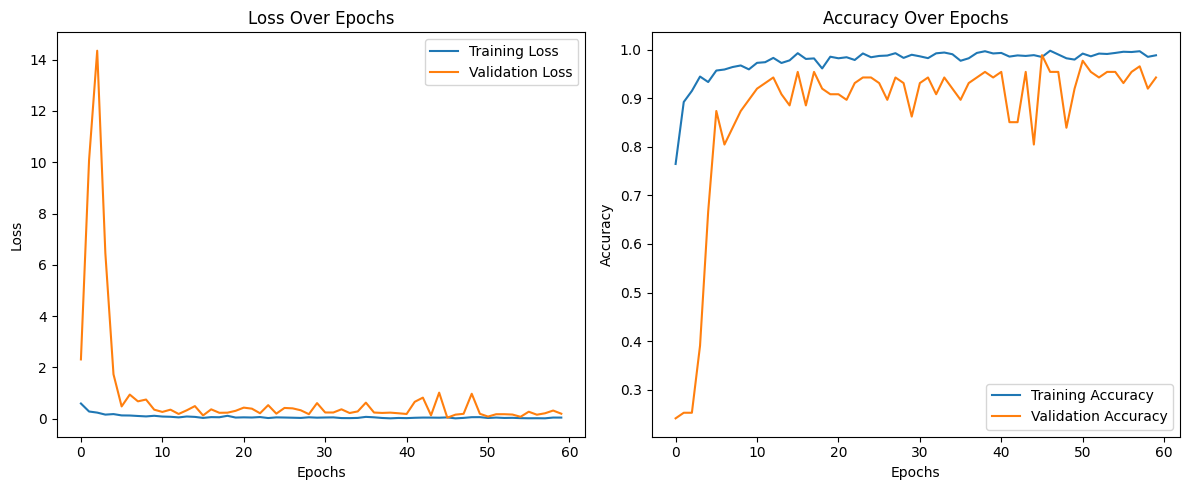

6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step

Performance on Test Data
Precision: 0.9040517756917051
Recall: 0.8950276243093923
F1 Score: 0.8947687092543201
Accuracy: 0.8950276243093923
Confusion Matrix:
                      Acacia_Modesta  Albizia_Lebbeck  Bauhinia_Variegatav  \
Acacia_Modesta                   36                9                    0   
Albizia_Lebbeck                   0               43                    0   
Bauhinia_Variegatav               0                0                   39   
Unknown                           2                1                    1   

                     Unknown  
Acacia_Modesta             0  
Albizia_Lebbeck            0  
Bauhinia_Variegatav        6  
Unknown                   44  


In [ ]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add,
    GlobalAveragePooling2D, Flatten, Dense
)
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Directory for the dataset
data_dir = dataset

# Define the CNN architecture

# Initialize the InceptionV3 model without pre-trained weights
inception_model = InceptionV3(weights=None, include_top=False, input_shape=(299, 299, 3))
# Create a custom model for binary classification
model = models.Sequential()
# Add the InceptionV3 base
model.add(inception_model)

# Add global average pooling layer
model.add(layers.GlobalAveragePooling2D())

# Add a dense layer with 1024 units and ReLU activation
model.add(layers.Dense(1024, activation='relu'))

# Add a final output layer with 2 units and softmax activation for multi-class (2-class) classification
model.add(layers.Dense(4, activation='softmax'))  # 4 output neurons for 4 classes

# Print the model summary


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Train'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'Validate'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'Test'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the model
history = model.fit(train_generator, epochs=60, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the model on given test generator
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the model on the test set
evaluate_model(test_generator, model, ['Acacia_Modesta', 'Albizia_Lebbeck', 'Bauhinia_Variegatav', 'Unknown'], title="Performance on Test Data")


# image form of confusion matrix
# Helper function to evaluate the model on given test generator
# def evaluate_model(test_generator, model, classes, title="Performance"):
#     y_test_pred = model.predict(test_generator)
#     y_test_pred = np.argmax(y_test_pred, axis=1)

#     precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
#     recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
#     f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
#     accuracy = accuracy_score(test_generator.labels, y_test_pred)

#     print(f"\n{title}")
#     print("Precision:", precision)
#     print("Recall:", recall)
#     print("F1 Score:", f1)
#     print("Accuracy:", accuracy)

#     # Display the confusion matrix
#     confusion = confusion_matrix(test_generator.labels, y_test_pred)
#     confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
#     print("Confusion Matrix:\n", confusion_df)

#     # Plot confusion matrix as heatmap
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g')
#     plt.title(f'Confusion Matrix - {title}')
#     plt.ylabel('True Labels')
#     plt.xlabel('Predicted Labels')
#     plt.show()
